In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'NanumGothicCoding' 
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../company_nps_data.csv', encoding = 'cp949')
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [3]:
# 전체 기업 개수 확인
len(df['회사ID'].unique())

5000

In [4]:
# 컬럼별 결측값 확인
df.isna().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

## **데이터 전처리**
1. 직원수 0명인 기업은 제외
2. 연매출액이 1000억 이상을 기록한 기업을 남김
3. 연매출액이 마이너스인 기업은 제외 
4. 3년 미만의 데이터가 있는 기업은 제외

In [5]:
# 직원수가 0명으로 작성된 기업의 ID추출
temp1 = df[df['월별_직원수']==0].iloc[:,0].unique()
temp1

array([478999, 568445, 288014, 550603, 439536, 602137, 291968, 277054,
       472629, 157237, 217292], dtype=int64)

In [6]:
# 연매출액이 1000억 이상인 기업의 ID추출
temp2 = df[df['연매출액']>100000000].iloc[:,0].unique()
temp2

array([231080, 130322, 232757, 127060, 130729, 231606, 419977, 510329,
       381180, 126606, 381344, 234236, 126831, 420082, 126664, 227414,
       128638, 420046, 129828, 127669, 126641,    102, 231703, 127511,
       126814, 420076, 294649, 440030, 128896, 403504, 403359, 294337,
       294530, 146654, 128539,     95, 294964, 126983,   2842, 297874,
       126521, 126772, 294620, 297327, 126516, 127090, 127180, 403351,
       128174, 127366, 419998, 294367, 130386, 231173, 127065, 154500,
       295805, 301484, 433492, 130577, 420008, 630190, 294790, 128440,
       403434, 403462, 126538, 403470, 426429, 227415, 130387,   8835,
       420237, 428817,  40860, 419945,     63, 295618, 126674, 469677,
       294387, 469458, 382850, 260890, 127202, 567650, 128485, 420092,
       231384,    597, 433756, 403522, 133951, 547586, 489849, 126802,
         5452, 430504, 296476, 420165, 580356, 439986, 439902],
      dtype=int64)

In [7]:
# 연매출액이 1000억 이상인 기업의 ID추출
temp3 = df[df['연매출액']<0].iloc[:,0].unique() 
temp3

array([432911], dtype=int64)

In [8]:
# 1,3번에 해당하는 기업은 제거하고, 2에 해당하는 기업은 포함한다.
df = df[~df['회사ID'].isin(temp1)]
df = df[df['회사ID'].isin(temp2)]
df = df[~df['회사ID'].isin(temp3)]

In [9]:
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
43,294790,96411248,2016,5,40334140,198
55,231080,152393780,2018,7,51609300,160
65,231080,132542490,2017,8,42458520,144
127,130322,201421946,2018,7,31335400,107
135,232757,294131018,2018,2,7610780,40
...,...,...,...,...,...,...
99635,126538,671580655,2016,10,380370640,1214
99724,294387,150451803,2017,9,161888520,768
99757,128174,106106973,2017,2,51496520,192
99760,420046,488179570,2017,7,121248540,398


In [10]:
# 36개월 이상의 데이터가 있는 경우만 걸리게 필터링한다.
company_df = df.groupby('회사ID').filter(lambda x : len(x) >= 36)
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
43,294790,96411248,2016,5,40334140,198
55,231080,152393780,2018,7,51609300,160
65,231080,132542490,2017,8,42458520,144
127,130322,201421946,2018,7,31335400,107
135,232757,294131018,2018,2,7610780,40
...,...,...,...,...,...,...
99635,126538,671580655,2016,10,380370640,1214
99724,294387,150451803,2017,9,161888520,768
99757,128174,106106973,2017,2,51496520,192
99760,420046,488179570,2017,7,121248540,398


In [11]:
# 전처리 후 남은 기업 개수 확인
len(company_df['회사ID'].unique())

76

In [12]:
company_df.sort_values(by=['회사ID','년도','월'], inplace=True)
company_df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
95996,126521,567910907,2015,11,525409000,1588
28780,126521,567910907,2015,12,503888480,1520
91940,126521,560278128,2016,1,514146080,1559
79111,126521,560278128,2016,2,520103520,1583
38276,126521,560278128,2016,3,519897880,1581
...,...,...,...,...,...,...
78403,510329,143513683,2018,8,137202420,609
54886,510329,143513683,2018,9,137436680,609
83728,510329,143513683,2018,10,138112640,614
24055,510329,143513683,2018,11,136699180,606


## **2차 필터링**
매출과 직원수를 연단위로 하여 평균값으로 계산하려고 한다.
1. 전년대비 연매출 증가율이 마이너스를 기록한 기업은 제외
2. 연 평균 직원수의 증가율이 마이너스를 기록한 기업은 제외

In [13]:
# 매출액과 직원수를 연도별 평균 데이터로 확인하기 위해 groupby() 메서드를 사용하여 재구성한다.
group_df = company_df.groupby(['회사ID','년도'])['연매출액','월별_직원수'].mean()
group_df.columns = ['연매출액', '연도별_평균직원수']
group_df['연도별_평균직원수'] = round(group_df['연도별_평균직원수'],1)
group_df.reset_index(inplace=True)

group_df

,회사ID,년도,연매출액,연도별_평균직원수
0,126521,2015,567910907.0,1554.0
1,126521,2016,560278128.0,1590.8
2,126521,2017,554767229.0,1499.2
3,126521,2018,567246558.0,1486.3
4,126538,2015,605381377.0,1159.0
...,...,...,...,...
294,469677,2018,108023614.0,546.4
295,510329,2015,149770456.0,595.0
296,510329,2016,136264259.0,596.9
297,510329,2017,134718002.0,593.0


In [14]:
# 연매출액과 연평균 직원수가 전년대비 상승한 비율을 넣을 컬럼을 생성한다.
group_df['연매출액_증가율(%)'] = round(group_df[['회사ID','연매출액']].groupby('회사ID').pct_change(),4) * 100
group_df['연직원수_증가율(%)'] = round(group_df[['회사ID','연도별_평균직원수']].groupby('회사ID').pct_change(),4) * 100
group_df = group_df[['회사ID','년도','연매출액','연매출액_증가율(%)','연도별_평균직원수','연직원수_증가율(%)']]
group_df

,회사ID,년도,연매출액,연매출액_증가율(%),연도별_평균직원수,연직원수_증가율(%)
0,126521,2015,567910907.0,NaN,1554.0,NaN
1,126521,2016,560278128.0,-1.34,1590.8,2.37
2,126521,2017,554767229.0,-0.98,1499.2,-5.76
3,126521,2018,567246558.0,2.25,1486.3,-0.86
4,126538,2015,605381377.0,NaN,1159.0,NaN
...,...,...,...,...,...,...
294,469677,2018,108023614.0,28.87,546.4,28.50
295,510329,2015,149770456.0,NaN,595.0,NaN
296,510329,2016,136264259.0,-9.02,596.9,0.32
297,510329,2017,134718002.0,-1.13,593.0,-0.65


In [15]:
# 결측값을 0으로 바꾼다
rate_year_df = group_df.fillna(0)
rate_year_df

,회사ID,년도,연매출액,연매출액_증가율(%),연도별_평균직원수,연직원수_증가율(%)
0,126521,2015,567910907.0,0.00,1554.0,0.00
1,126521,2016,560278128.0,-1.34,1590.8,2.37
2,126521,2017,554767229.0,-0.98,1499.2,-5.76
3,126521,2018,567246558.0,2.25,1486.3,-0.86
4,126538,2015,605381377.0,0.00,1159.0,0.00
...,...,...,...,...,...,...
294,469677,2018,108023614.0,28.87,546.4,28.50
295,510329,2015,149770456.0,0.00,595.0,0.00
296,510329,2016,136264259.0,-9.02,596.9,0.32
297,510329,2017,134718002.0,-1.13,593.0,-0.65


In [16]:
# 연매출액 증가율이 마이너스인 기업의 ID 추출
temp4 = rate_year_df[rate_year_df['연매출액_증가율(%)']<0].iloc[:,0].unique()
temp4

array([126521, 126674, 126772, 126802, 126814, 126831, 127060, 127065,
       127090, 127180, 127202, 127511, 128174, 128485, 128638, 128896,
       129828, 130322, 130386, 130387, 130577, 130729, 146654, 154500,
       231173, 231384, 231606, 234236, 294367, 294387, 294620, 294649,
       294790, 295618, 296476, 297874, 301484, 381180, 381344, 403351,
       403504, 419977, 419998, 420008, 420076, 420082, 426429, 428817,
       430504, 510329], dtype=int64)

In [17]:
# 연평균 직원수 증가율이 마이너스인 기업의 ID 추출
temp5 = rate_year_df[rate_year_df['연직원수_증가율(%)']<0].iloc[:,0].unique()
temp5

array([126521, 126538, 126606, 126674, 126814, 126831, 126983, 127060,
       127065, 127090, 127180, 127202, 127511, 128174, 128440, 128485,
       128539, 128638, 128896, 129828, 130322, 130386, 130577, 130729,
       146654, 154500, 231080, 231173, 231384, 231606, 231703, 234236,
       294649, 294790, 296476, 297327, 301484, 381180, 403351, 403434,
       403462, 403504, 419945, 419977, 420076, 420082, 428817, 430504,
       510329], dtype=int64)

In [18]:
# 연매출과 연평균 직원수가 모두 상승인 기업들로만 추려졌다.
increase_df = rate_year_df[~rate_year_df['회사ID'].isin(temp4)]
increase_df = increase_df[~increase_df['회사ID'].isin(temp5)]
increase_df

,회사ID,년도,연매출액,연매출액_증가율(%),연도별_평균직원수,연직원수_증가율(%)
12,126664,2015,2.565052e+08,0.00,742.0,0.00
13,126664,2016,3.044082e+08,18.68,782.3,5.43
14,126664,2017,3.232786e+08,6.20,818.2,4.59
15,126664,2018,3.538391e+08,9.45,845.3,3.31
60,127366,2015,5.579679e+07,0.00,244.5,0.00
61,127366,2016,7.430688e+07,33.17,248.8,1.76
62,127366,2017,1.752605e+08,135.86,275.9,10.89
63,127366,2018,2.069512e+08,18.08,315.1,14.21
68,127669,2015,1.418091e+08,0.00,195.0,0.00
69,127669,2016,1.541697e+08,8.72,209.8,7.59


In [19]:
# 기업수는 15개
len(increase_df['회사ID'].unique())

15

## **데이터 시각화 및 10개 기업선정**

In [20]:
company_list = increase_df['회사ID'].unique()
company_list

array([126664, 127366, 127669, 133951, 227414, 227415, 232757, 294337,
       294530, 382850, 403359, 403470, 420046, 420165, 469677],
      dtype=int64)

Text(0.5, 1.0, '연도별 직원수')

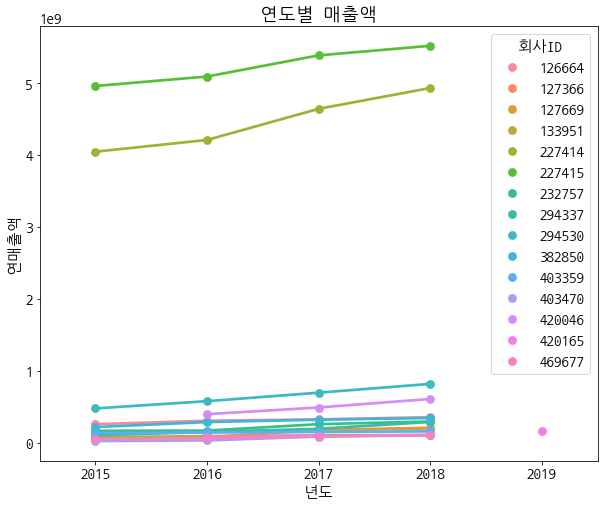

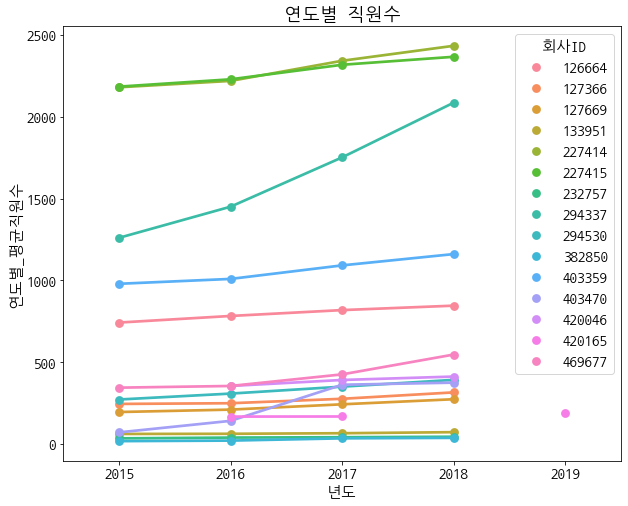

In [21]:
# 먼저 15개 기업의 매출액을 꺾은선 그래프로 비교한다.
plt.figure(figsize=(10,8))
sns.pointplot(data=increase_df, x='년도', y='연매출액', hue='회사ID')
plt.title('연도별 매출액')


plt.figure(figsize=(10,8))
sns.pointplot(data=increase_df, x='년도', y='연도별_평균직원수', hue='회사ID')
plt.title('연도별 직원수')

# 227414, 227415 두 기업은 매출액과 직원수에서 다른 기업보다 월등히 앞서므로 유니콘 기업으로 선택

In [22]:
# 연매출액 증가율이 30% 이상 증가한 연도가 있는 기업을 확인한다
high_list = increase_df[increase_df['연매출액_증가율(%)']>30].iloc[:,0].unique()
final_df = increase_df[increase_df['회사ID'].isin(high_list)]

high_list

# 총 7개의 기업 확인

array([127366, 232757, 294337, 382850, 403470, 420165, 469677],
      dtype=int64)

Text(0.5, 1.0, '연매출액 증가율')

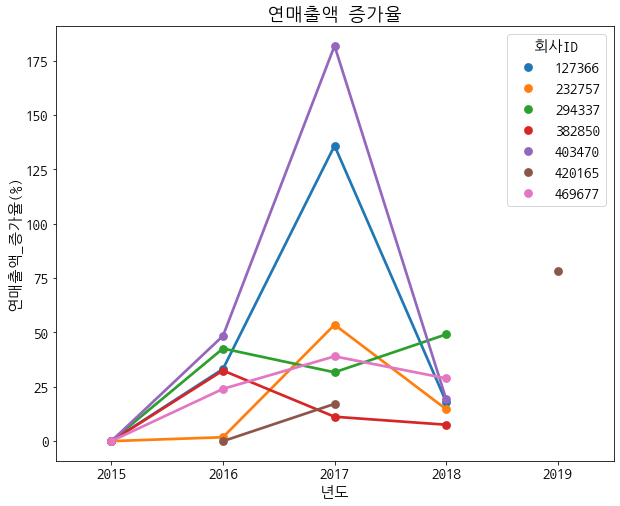

In [23]:
# 마찬가지로 위 7개 기업의 연매출액 증가율을 그래프로 확인해본다.
plt.figure(figsize=(10,8))
sns.pointplot(data=final_df, x='년도', y='연매출액_증가율(%)', hue='회사ID')
plt.title('연매출액 증가율')

# 여기서 420165 기업은 2019년에 급등한 것으로 나타났지만
# 실제로는 18년의 자료가 없어서 17->19년 변화율이기 때문에 위 조건에는 타당하지 않으므로 제외한다.
# 420165를 제외한 6개 기업을 유니콘 기업으로 선정한다.

In [24]:
# 기업별 데이터를 그래프로 나타내기 위한 함수 생성
def num_graph(x) :
    data = increase_df[increase_df['회사ID'] == x]
    plt.figure(figsize=(10,8))
    sns.pointplot(data=data, x='년도', y='연매출액')
    plt.title(str(x) + ' 연매출액')

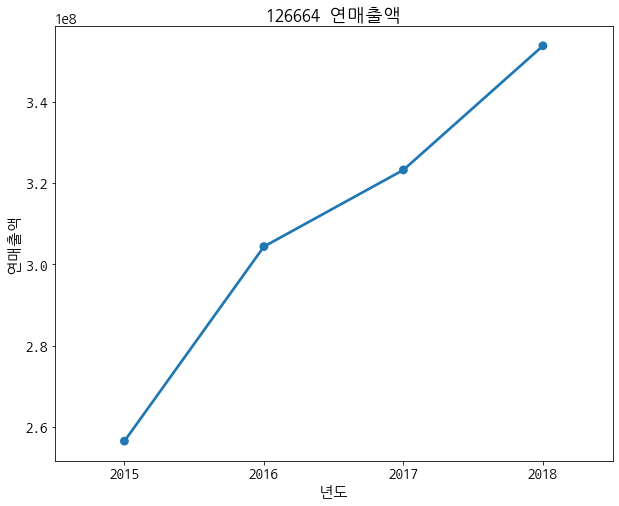

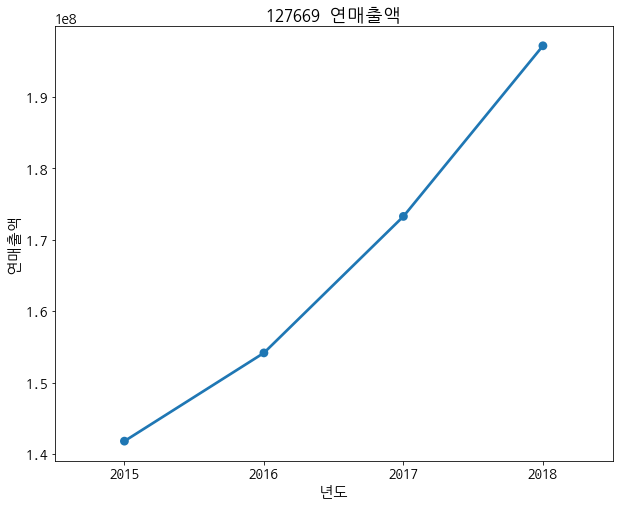

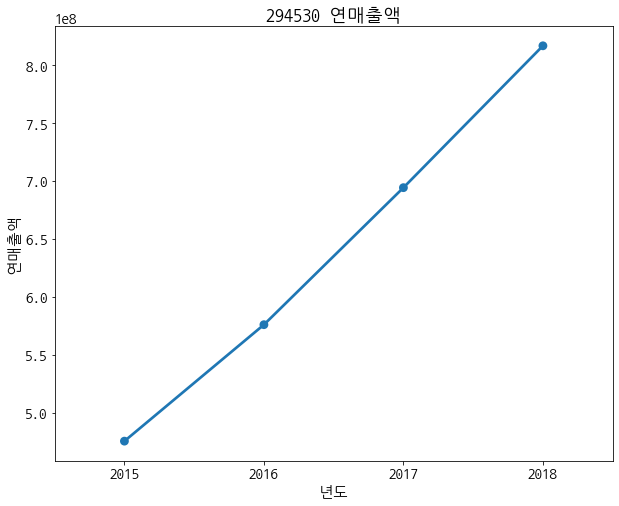

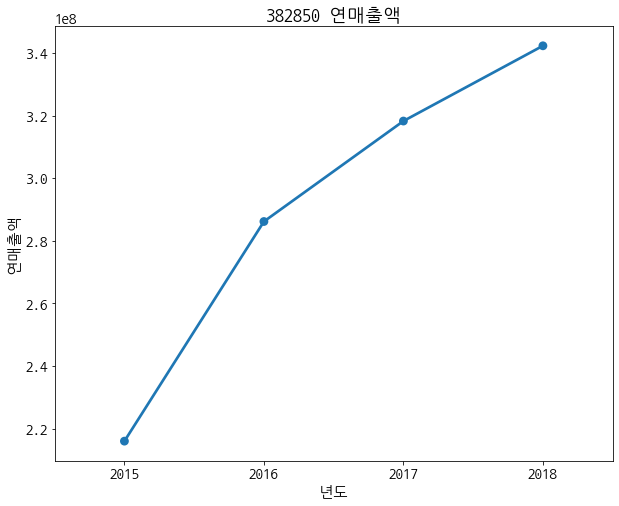

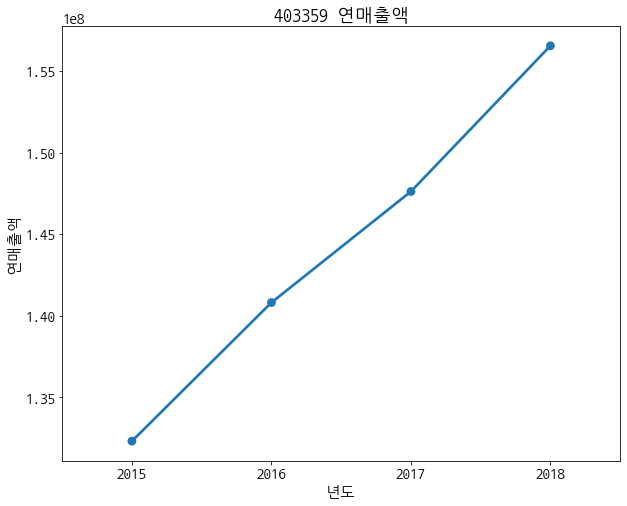

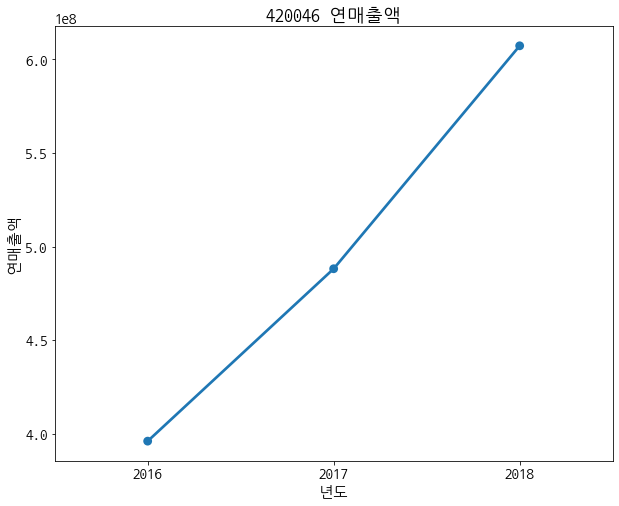

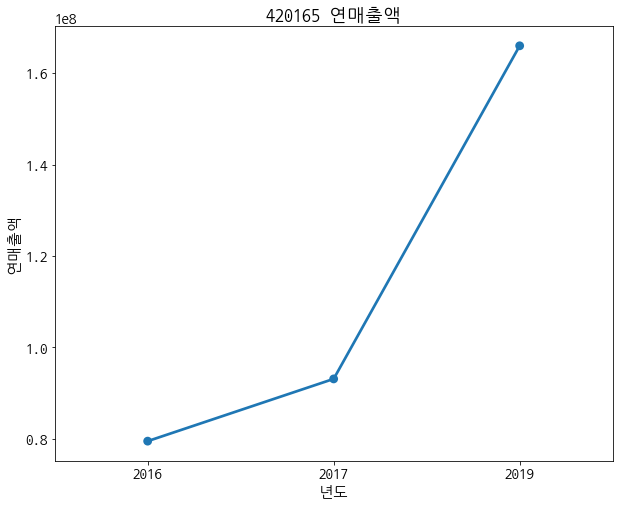

In [25]:
# 남은 7개 기업을 리스트로 담고 연매출액 그래프를 각각 그려본다
com_list = [126664,127669,294530,382850,403359,420046,420165]
for i in com_list :
    num_graph(i)

In [26]:
# 위 그래프를 통해 294530, 420046 두 기업이 높은 연매출속에서 꾸준한 상승을 이루었음을 확인
# 위 두 기업을 유니콘 기업으로 선정한다.

# **최종 결론**
### 15개 중 최종 10개 기업 결정
1. 227414, 227415 - 연매출액이 15개 기업 중 월등하게 높음
2. 127366, 232757, 294337, 382850, 403470, 469677 - 연매출 증가율이 30% 이상을 기록함
3. 294530,  420046 - 남은 기업들 중 높은 연매출액을 계속 상승시킴
  
127366, 227414, 227415, 232757, 294337, 294530, 382850, 403470, 420046, 469677 을 유니콘 기업으로 결정한다. 